In [1]:
import pandas as pd

chebi = pd.read_csv("ChEBI_Results.tsv", sep="\t")
chebi.iloc[:, 0].to_csv("chebi_ids.txt", index=False)

In [2]:
# replace chebi in first column with nothing
chebi.iloc[:, 0].str.replace("CHEBI:", "").to_csv("chebi_ids.txt", index=False)


In [8]:
chebi.iloc[:, 0].replace.head()

CHEBI:2483    adenosylcobyric acid
CHEBI:3789     cobalt-precorrin-6B
CHEBI:3790      cobalt-precorrin-2
CHEBI:3791      cobalt-precorrin-3
CHEBI:3792      cobalt-precorrin-4
Name: ID, dtype: object

In [1]:
import pandas as pd
cofactor_list = pd.read_csv("cofactor_kegg_ids.txt")
#get all kegg_ids without nan
cofactor_list = cofactor_list[~cofactor_list["KEGG"].isna()]
cofactor_list = cofactor_list.loc[:, "KEGG"].tolist()

In [5]:

#export cofactor list to pickle file
import pickle
with open("cofactor_list.pkl", "wb") as f:
    pickle.dump(cofactor_list, f)

cofactor_list

['C06507',
 'C11543',
 'C11538',
 'C11539',
 'C11540',
 'C11542',
 'C11545',
 'C03516',
 'C06407',
 'C06399',
 'C06320',
 'C06416',
 'C06406',
 'C06319',
 'C06503',
 'C05772',
 'C06408',
 'C19610',
 'C11242',
 'C11243',
 'C05773',
 'C13884',
 'C13881',
 'C16541',
 'C01413',
 'C00175',
 'C06267',
 'C16242',
 'C16243',
 'C16244',
 'C18163',
 'C17401',
 'C18151',
 'C18160',
 'C21510',
 'C21511',
 'C05306',
 'C05307',
 'C00070',
 'C19609',
 'C11850',
 'C00876',
 'C03576',
 'C05777',
 'C04628',
 'C19154',
 'C19151',
 'C06313',
 'C06313',
 'C01847',
 'C00005',
 'C01134',
 'C00004',
 'C00032',
 'C05778',
 'C00748',
 'C14818',
 'C00061',
 'C08592',
 'C16071',
 'C04536',
 'C11830',
 'C11829',
 'C05913',
 'C02880',
 'C02139',
 'C04332',
 'C00305',
 'C06098',
 'C05650',
 'C01330',
 'C00238',
 'C00076',
 'C11831',
 'C12661',
 'C11832',
 'C00006',
 'C16540',
 'C18152',
 'C15965',
 'C15672',
 'C14819',
 'C00194',
 'C00019',
 'C00853',
 'C00016',
 'C00541',
 'C00113',
 'C06453',
 'C16241',
 'C00272',

In [11]:
from sm_precursor_predictor.data_integration.generate_kegg_networks import KeggNetworkGenerator
import networkx as nx
import pickle
#read from pickle file
with open("cofactor_list.pkl", "rb") as f:
    cofactor_list = pickle.load(f)

# graph = KeggNetworkGenerator.get_kegg_network("map00902", cofactor_list)
graph = KeggNetworkGenerator.get_kegg_network("map00996", cofactor_list)

In [3]:
graph.edges("C00400")

OutEdgeDataView([('C00400', 'R02177')])

In [12]:
print(list(nx.shortest_path(graph, "C01054", "C08795")))

['C01054', 'R09688', 'C19819', 'R12007', 'C03024', 'R12834', 'C22434', 'R12837', 'C22435', 'R12845', 'C08795']


In [13]:
print(list(nx.shortest_path(graph, "C00187", "C08795")))

['C00187', 'R12846', 'C03024', 'R12834', 'C22434', 'R12837', 'C22435', 'R12845', 'C08795']


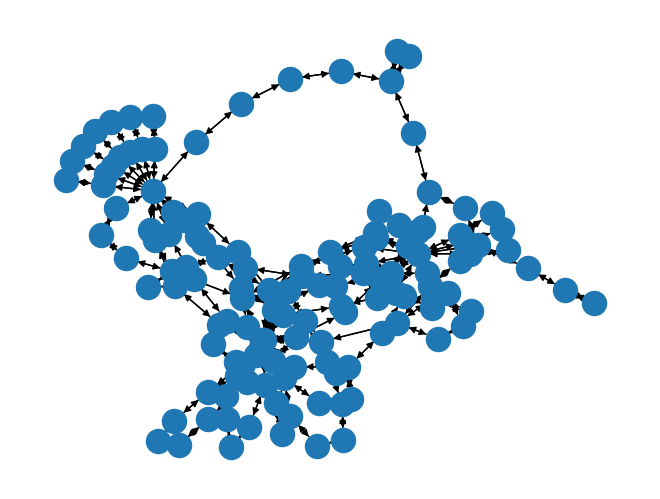

In [3]:


nx.draw(graph)

In [1]:
import pandas as pd
pathways = pd.read_csv("precursors_map_curated_3.csv").iloc[:, 0]

In [4]:
pathways

0     map00902
1     map00909
2     map00904
3     map00906
4     map00905
5     map00981
6     map00908
7     map01059
8     map01053
9     map00940
10    map00941
11    map00944
12    map00942
13    map00943
14    map00945
15    map00901
16    map00403
17    map00950
18    map00960
19    map00965
20    map00966
21    map00402
22    map00996
23    map00999
Name: pathway, dtype: object

In [2]:
from sm_precursor_predictor.data_integration.generate_kegg_networks import KeggNetworkGenerator

graphs = KeggNetworkGenerator.generate_graphs_for_map_ids(pathways)

map00999: 100%|██████████| 135/135 [08:07<00:00,  3.61s/it] 


In [3]:
graphs

{'map00902': <networkx.classes.digraph.DiGraph at 0x7fc38c0aaf10>,
 'map00909': <networkx.classes.digraph.DiGraph at 0x7fc3ccc3fd30>,
 'map00904': <networkx.classes.digraph.DiGraph at 0x7fc3884c5130>,
 'map00906': <networkx.classes.digraph.DiGraph at 0x7fc3884c51f0>,
 'map00905': <networkx.classes.digraph.DiGraph at 0x7fc38847f190>,
 'map00981': <networkx.classes.digraph.DiGraph at 0x7fc3884c5ee0>,
 'map00908': <networkx.classes.digraph.DiGraph at 0x7fc3881adaf0>,
 'map01059': <networkx.classes.digraph.DiGraph at 0x7fc3881adcd0>,
 'map01053': <networkx.classes.digraph.DiGraph at 0x7fc3884bc160>,
 'map00940': <networkx.classes.digraph.DiGraph at 0x7fc3881adc10>,
 'map00941': <networkx.classes.digraph.DiGraph at 0x7fc3884bc820>,
 'map00944': <networkx.classes.digraph.DiGraph at 0x7fc3880dae20>,
 'map00942': <networkx.classes.digraph.DiGraph at 0x7fc3cc7df2e0>,
 'map00943': <networkx.classes.digraph.DiGraph at 0x7fc388dae3d0>,
 'map00945': <networkx.classes.digraph.DiGraph at 0x7fc3880948

In [4]:
# save in pickle
import pickle
with open("graphs.pkl", "wb") as f:
    pickle.dump(graphs, f)